In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.datasets import make_moons
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image  
import pydot

In [2]:
seed = 42
np.random.seed(seed)

### Regularização

Como vimos, as árvores de decisão são livres para se ajustarem aos dados de treinamento e por isso, podem se sobreajustar à eles.

Para evitarmos o sobreajuste do modelo, precisamos restringir a liberdade da árvore de decisão durante o treinamento. 

Como já sabemos, isso se chama regularização. Os hiperparâmetros de regularização dependem do algoritmo usado, mas geralmente, podemos pelo menos restringir a profundidade máxima da árvore de decisão. 

No Scikit-Learn, isso é controlado pelo hiperparâmetro `max_depth` (o valor padrão é `None`, o que significa liberdade ilimitada). Reduzir o valor de `max_depth` regularizará o modelo e, assim, reduzirá o risco de sobreajuste.

A classe `DecisionTreeClassifier` tem alguns outros parâmetros que restringem de forma semelhante a forma da árvore de decisão: 
+ `min_samples_split`: define o número mínimo de exemplos que um nó deve ter antes de ser dividido, 
+ `min_samples_leaf`: define o número mínimo de exemplos que um nó folha deve ter, 
+ `min_weight_fraction_leaf`: mesmo que `min_samples_leaf`, mas expresso como uma fração do número total de exemplos ponderados. 
+ `max_leaf_nodes`: define o número máximo de nós folha.
+ `max_features`: define o número máximo de atributos que são avaliados para divisão em cada nó. 

Aumentar os hiperparâmetros `min_*` ou reduzir os hiperparâmetros `max_*` regularizará o modelo.

In [3]:
# Definition of utility functions.
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

### Gerando os dados.

In [4]:
# noise: Standard deviation of Gaussian noise added to the data.
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

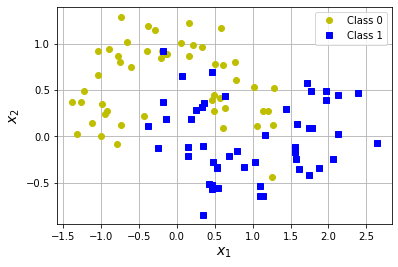

In [5]:
plt.plot(Xm[:, 0][ym==0], Xm[:, 1][ym==0], "yo", label="Class 0")
plt.plot(Xm[:, 0][ym==1], Xm[:, 1][ym==1], "bs", label="Class 1")
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Treinando os modelos.

In [6]:
deep_tree_clf1 = DecisionTreeClassifier(criterion='entropy', random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4, random_state=42)
deep_tree_clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
deep_tree_clf4 = DecisionTreeClassifier(criterion='entropy', min_samples_split=7, random_state=42)

deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)
deep_tree_clf3.fit(Xm, ym)
deep_tree_clf4.fit(Xm, ym)

y_pred1 = deep_tree_clf1.predict(Xm)
y_pred2 = deep_tree_clf2.predict(Xm)
y_pred3 = deep_tree_clf3.predict(Xm)
y_pred4 = deep_tree_clf4.predict(Xm)

### Regularização

As figuras abaixo mostram árvores de decisão treinadas no conjunto de dados das luas com diferentes configurações de hiperparâmetros. 

À esquerda, a árvore de decisão é treinada com os hiperparâmetros padrão (ou seja, sem restrições).

À direita, a árvore de decisão é treinada com `min_samples_leaf=4`. É bastante óbvio que o modelo da esquerda esta sobreajustando e o modelo da direita provavelmente generalizará melhor.

Com `max_depth=2`, a árvore é simples demais, e subajusta.

Com `min_samples_split=7`, ela já comecaria a sobreajustar.

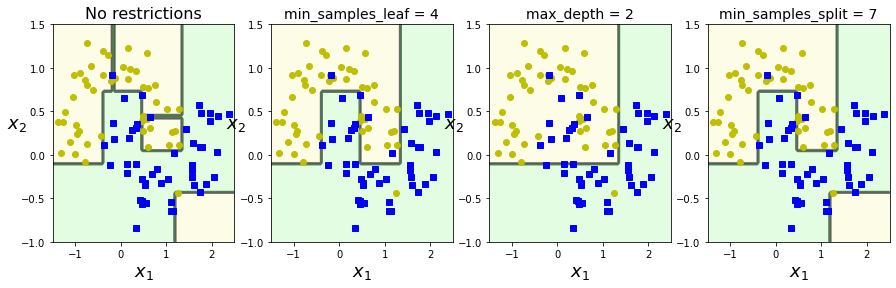

In [7]:
plt.figure(figsize=(15, 4))
plt.subplot(141)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(142)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.subplot(143)
plot_decision_boundary(deep_tree_clf3, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("max_depth = {}".format(deep_tree_clf3.max_depth), fontsize=14)
plt.subplot(144)
plot_decision_boundary(deep_tree_clf4, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_split = {}".format(deep_tree_clf4.min_samples_split), fontsize=14)
plt.show()

### Árvore ilimitada

In [8]:
accuracy1 = accuracy_score(ym, y_pred1)
print('accuracy: ',accuracy1)

accuracy:  1.0


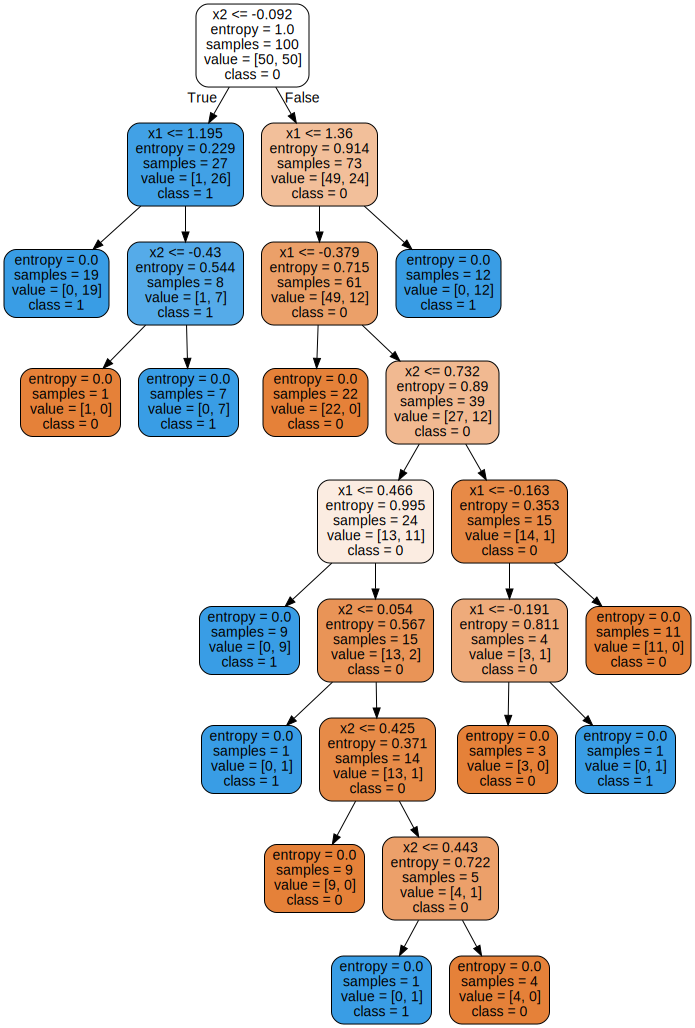

In [9]:
dot_data = export_graphviz(deep_tree_clf1, feature_names=['x1','x2'], class_names=['0', '1'], rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

### Árvore com `min_samples_leaf=4`

In [10]:
accuracy2 = accuracy_score(ym, y_pred2)
print('accuracy: ',accuracy2)

accuracy:  0.96


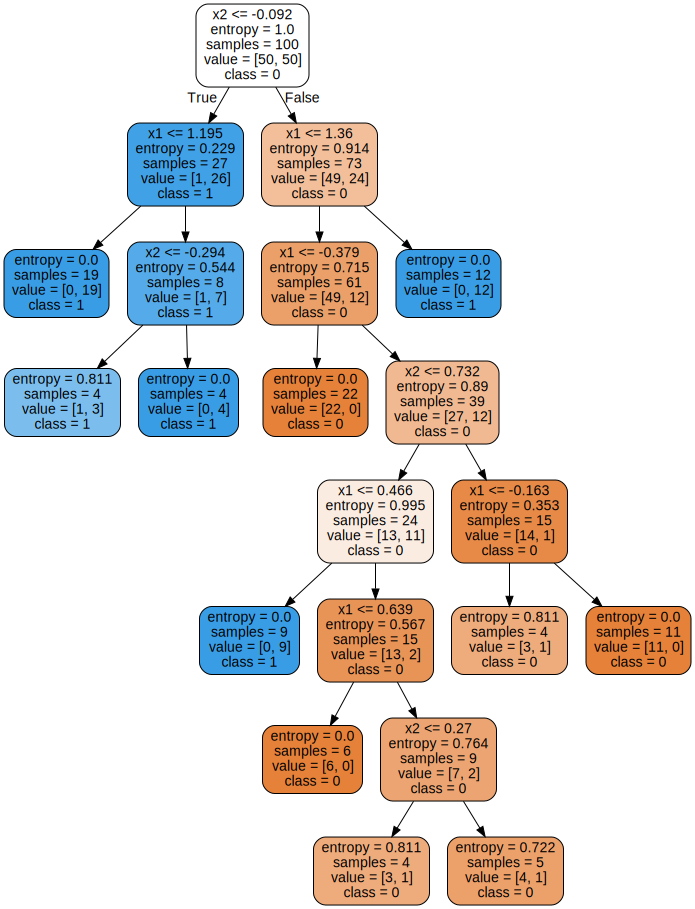

In [11]:
dot_data = export_graphviz(deep_tree_clf2, feature_names=['x1','x2'], class_names=['0', '1'], rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

### Árvore com `max_depth=2`

In [12]:
accuracy3 = accuracy_score(ym, y_pred3)
print('accuracy: ',accuracy3)

accuracy:  0.87


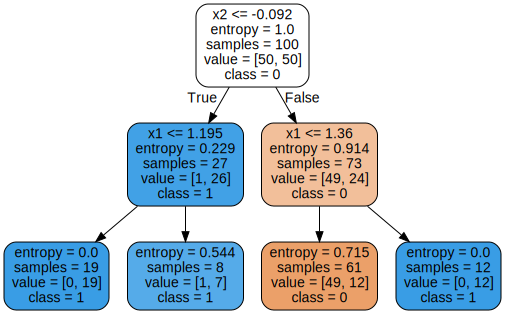

In [13]:
dot_data = export_graphviz(deep_tree_clf3, feature_names=['x1','x2'], class_names=['0', '1'], rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

### Árvore com `min_samples_split=7`

In [14]:
accuracy4 = accuracy_score(ym, y_pred4)
print('accuracy: ',accuracy4)

accuracy:  0.98


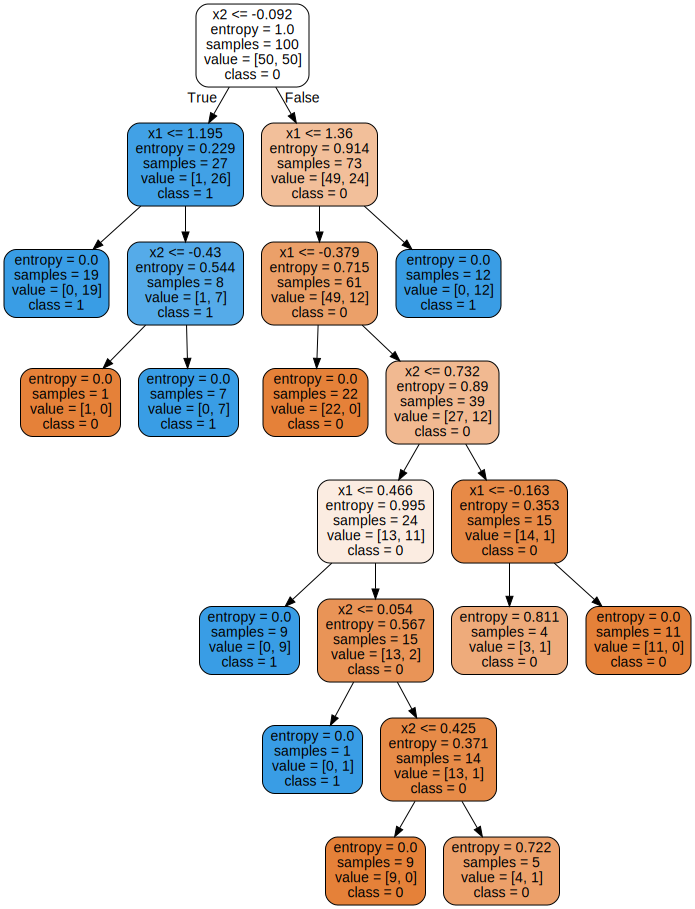

In [15]:
dot_data = export_graphviz(deep_tree_clf4, feature_names=['x1','x2'], class_names=['0', '1'], rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph